In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
#plt.rcParams['animation.html'] = 'jshtml'
from IPython.display import HTML

import os
import sys
from functools import reduce
sys.path.append("/home/ful7rng/projects/transition/propagation")
from utils import pickle_load, get_npy, get_file
from utils.occ_map_utils import load_map, show_map, plot_occ_map, plot_trajectories, free_space
from utils.scene_utils import display_scenes_trajs, animate_scenes

In [2]:
data_folder = '/local/data/scenes'
file_list = []
# get all .npy files
for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.endswith(".npy"):
            file_list.append(os.path.join(root, file))
            # print(os.path.join(root, file))

### statistics of the data

In [9]:
data = map(lambda file_: np.load(file_), file_list)
num_scenes = map(lambda scenes: scenes.shape[0], data)
intervals = map(lambda scenes: map(lambda scene: scene.end-scene.start, scenes), data)
intervals_flatten = reduce(lambda x, y: x+y, intervals)
num_records = map(lambda scenes: map(lambda scene: scene.hits.shape[0], scenes), data)
num_records_flatten = reduce(lambda x, y: x+y, num_records)
print("Found %d scenes in total" % sum(num_scenes))
total_scenes = sum(num_scenes)

Found 6765 scenes in total


Text(0,0.5,u'counts')

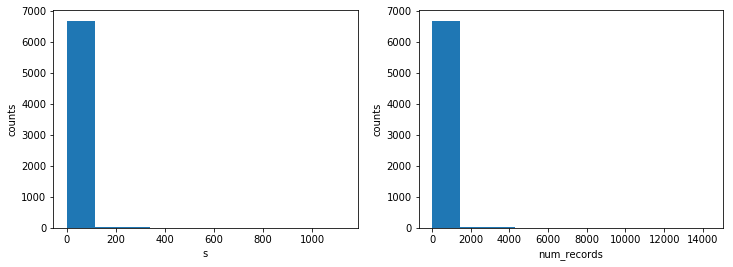

In [4]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
_, _, _ = plt.hist(intervals_flatten)
plt.xlabel("s")
plt.ylabel("counts")
fig.add_subplot(122)
_, _, _ = plt.hist(num_records_flatten)
plt.xlabel("num_records")
plt.ylabel("counts")

Text(0,0.5,u'counts')

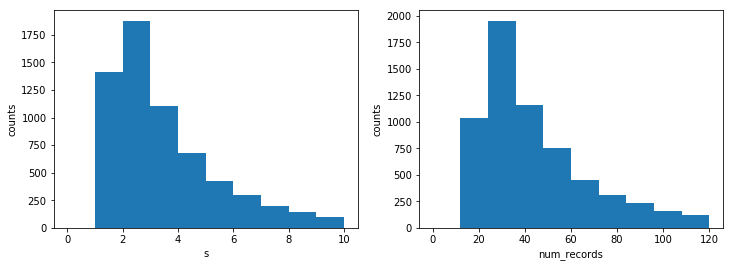

In [5]:
max_interval = 10
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
_, _, _ = plt.hist(intervals_flatten, range=(0, max_interval))
plt.xlabel("s")
plt.ylabel("counts")
fig.add_subplot(122)
_, _, _ = plt.hist(num_records_flatten, range=(0, max_interval * 12))
plt.xlabel("num_records")
plt.ylabel("counts")

In [161]:
x = np.random.rand(7, 8)

In [162]:
x = x[np.random.randint(0, 7, 4)]

In [163]:
x.shape

(4, 8)

In [20]:
# get scene whose time interval bigger than 10s
idxs = []
idxs_ = []
for file_idx, interval_list in enumerate(intervals):
    for scene_idx, interval in enumerate(interval_list):
        if interval > 10:
            idxs.append((file_idx, scene_idx))
        if interval <= 3:
            idxs_.append((file_idx, scene_idx))
print("Found %d scenes (= %.3f%%) whose interval is longer than 10s" % (len(idxs), float(len(idxs))/total_scenes*100))
print("Found %d scenes (= %.3f%%) whose interval is shorter than 3s" % (len(idxs_), float(len(idxs_))/total_scenes*100))

Found 536 scenes (= 7.923%) whose interval is longer than 10s
Found 3292 scenes (= 48.662%) whose interval is shorter than 3s


In [153]:
min_time_interval = 2
# get scene whose time interval longer than min_time_interval
eval_data = []
idxs_ = []
for file_idx, interval_list in enumerate(intervals):
    for scene_idx, interval in enumerate(interval_list):
        if min_time_interval <= interval:
            idxs_.append((file_idx, scene_idx))
            eval_data.append(data[file_idx][scene_idx])
print("Found %d scenes (= %.3f%%) whose interval is >= {}s" % (
        len(idxs_), float(len(idxs_)) / total_scenes * 100), min_time_interval)



('Found 5350 scenes (= 79.084%) whose interval is >= {}s', 2)


In [154]:
eval_data = np.array(eval_data)

In [155]:
eval_data.shape

(5350,)

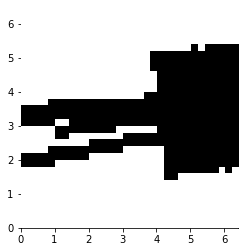

In [157]:
show_map(eval_data[0].seens[1], resolution=eval_data[0].res)

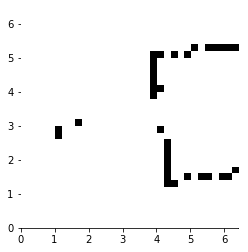

In [158]:
show_map(eval_data[0].hits[1], resolution=eval_data[0].res)

/local/data/scenes/80_new/pioneer2/03_28/2017-03-28-18-39-24_28.npy


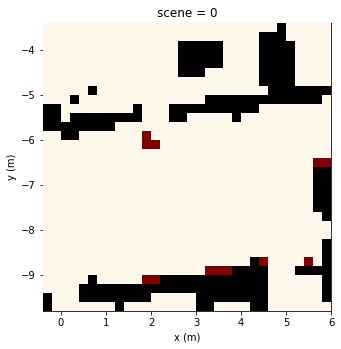

In [8]:
random_idx = np.random.randint(0, len(idxs))
f_idx, scene_idx = idxs[random_idx]
f = file_list[f_idx]
print(f)
scenes = get_npy(get_file(f, 'scenes'), None)
trajs = get_npy(get_file(f, 'trajectories/real'), None)
# display_scenes_trajs([scenes[scene_idx]], [trajs[scene_idx]])
ani = animate_scenes([scenes[scene_idx]], need_return=True)
HTML(ani.to_jshtml())

### look into the data

In [30]:
f = np.random.choice(file_list)
# f = '/home/ful7rng/projects/transition/data/scenes/80_new/pioneer2/04_19/2017-04-19-16-26-00_18.npy'
print(f)
scenes = get_npy(get_file(f, 'scenes'), None)
trajs = get_npy(get_file(f, 'trajectories/real'), None)
print("Found %d scenes" % scenes.shape[0])
print("Found %d trajectories" % trajs.shape[0])

/local/data/scenes/80_new/pioneer2/04_19/2017-04-19-12-06-00_5.npy
Found 55 scenes
Found 55 trajectories


In [248]:
def show_contents(scene):
    for key in scene.__dict__.keys():
        if not isinstance(scene.__dict__[key], np.ndarray):
            print("{}: {}".format(key, scene.__dict__[key]))
        else:
            print("{}: ndarray of shape {}".format(key, scene.__dict__[key].shape))

In [31]:
for key in scenes[0].__dict__.keys():
    if not isinstance(scenes[0].__dict__[key], np.ndarray):
        print("{}: {}".format(key, scenes[0].__dict__[key]))
    else:
        print("{}: ndarray of shape {}".format(key, scenes[0].__dict__[key].shape))

origin: ndarray of shape (2,)
seens: ndarray of shape (41, 32, 32)
hits: ndarray of shape (41, 32, 32)
end: 1492596371.74
res: 0.2
start: 1492596368.54
static_map: ndarray of shape (32, 32)


In [33]:
trajs[0].shape[0]

39

In [32]:
for t in trajs[0][:, 0]:
    print(t)

1492596369.04
1492596369.24
1492596369.29
1492596369.39
1492596369.44
1492596369.54
1492596369.59
1492596369.79
1492596369.84
1492596369.94
1492596369.99
1492596370.09
1492596370.19
1492596370.24
1492596370.34
1492596370.39
1492596370.49
1492596370.54
1492596370.64
1492596370.74
1492596370.79
1492596370.89
1492596370.94
1492596371.04
1492596371.09
1492596371.19
1492596371.29
1492596371.34
1492596371.44
1492596371.49
1492596371.59
1492596371.64
1492596371.74
1492596371.84
1492596371.89
1492596371.99
1492596372.04
1492596372.14
1492596372.24


found 1 trajs


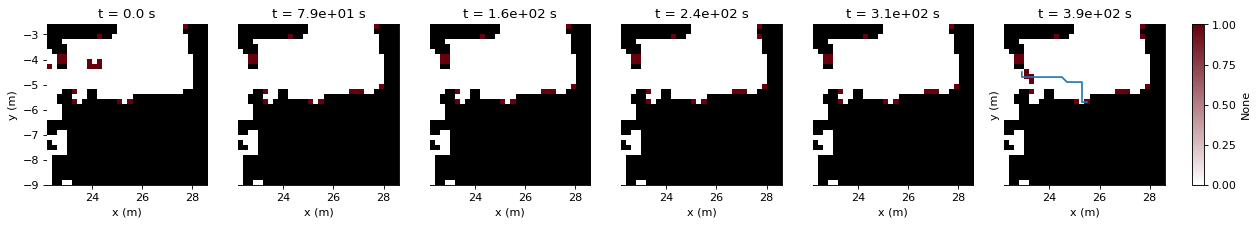

In [83]:
scene_idx = np.random.randint(0, len(scenes))
display_scenes_trajs([scenes[scene_idx]], [trajs[scene_idx]])

### problematic scenes 

### check whether time interval of a scene matches length of seens

In [240]:
min_time_interval = 2
laser_freq = 12

In [237]:
file_list = []
names = []
# get all .npy files
for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.endswith(".npy"):
            file_list.append(os.path.join(root, file))
            names.append(file.split('.')[-2])

In [238]:
# load all scenes
data = map(lambda file_: np.load(file_), file_list)
num_scenes = map(lambda scenes: scenes.shape[0], data)
intervals = map(lambda scenes: map(lambda scene: scene.end - scene.start, scenes), data)
total_scenes = sum(num_scenes)
print("Found %d scenes in total" % total_scenes)


Found 6765 scenes in total


In [243]:
# get scene whose time interval longer than min_time_interval
eval_data = []
idxs_ = []
problematic = []
for file_idx, interval_list in enumerate(intervals):
    for scene_idx, interval in enumerate(interval_list):
        if min_time_interval <= interval:
            # numbers of hits do not match time interval
            if data[file_idx][scene_idx].hits.shape[0] >= min_time_interval * laser_freq:
                idxs_.append((file_idx, scene_idx))
                eval_data.append(data[file_idx][scene_idx])
            else:
                problematic.append((file_idx, scene_idx))
eval_data = np.array(eval_data)

num_scenes_needed = len(idxs_)
print("Found %d scenes (= %.3f%%) whose interval is >= %ds" % (
    num_scenes_needed, float(num_scenes_needed) / total_scenes * 100, min_time_interval))
num_problematic_scenes = len(problematic)
print("Found %d scenes (= %.3f%%) whose interval does not match number of hits." % (
    num_problematic_scenes, float(num_problematic_scenes) / total_scenes * 100))

Found 5349 scenes (= 79.069%) whose interval is >= 2s
Found 1 scenes (= 0.015%) whose interval does not match number of hits.


In [244]:
print(problematic)

[(59, 0)]


In [245]:
x = data[59][0]

In [246]:
print("time interval: %f" % (x.end - x.start))
print("num of hits: %d" % x.hits.shape[0])
print("num of seens: %d" % x.seens.shape[0])

time interval: 2.049952
num of hits: 21
num of seens: 21


In [249]:
show_contents(x)

origin: ndarray of shape (2,)
seens: ndarray of shape (21, 32, 32)
hits: ndarray of shape (21, 32, 32)
end: 1490719166.36
res: 0.2
start: 1490719164.31
static_map: ndarray of shape (32, 32)


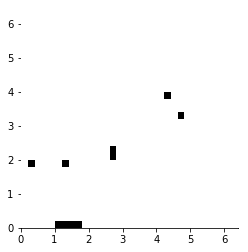

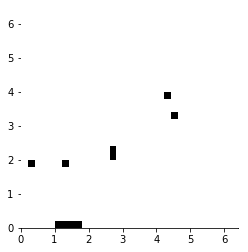

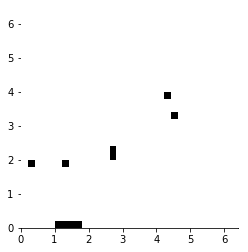

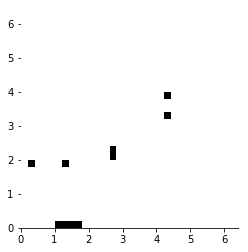

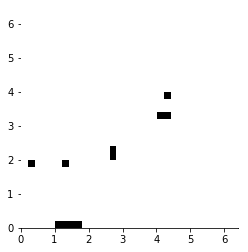

KeyboardInterrupt: 

In [252]:
for hit in x.hits:
    show_map(hit, resolution=x.res)
    plt.show()
    raw_input()

### overlap multiple image on one Axes

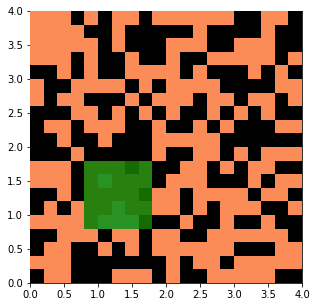

In [366]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_subplot(111)
map_1 = np.random.randint(0, 2, (20, 20))
map_2 = np.zeros_like(map_1)
map_3 = np.zeros_like(map_1)
map_2[slice(4, 9), slice(4, 9)] = np.random.randn(5, 5)
map_3[slice(4, 9), slice(4, 9)] = np.ones((5, 5))
map_1[slice(4, 9), slice(4, 9)] = 0
axes.add_image(show_map(map_2, resolution=0.2, cmap='OrRd', zorder=10, ax=axes))
axes.add_image(show_map(map_1, resolution=0.2, ax=axes, cmap=black_cm))
axes.add_image(show_map(map_3, resolution=0.2, ax=axes, cmap=green_cm))

In [68]:
from matplotlib.colors import colorConverter
import matplotlib as mpl

# # generate the colors for your colormap
# white = colorConverter.to_rgba('white')
# black = colorConverter.to_rgba('black')
# green = colorConverter.to_rgba('green')


# make the colormaps
black_cm = mpl.colors.LinearSegmentedColormap.from_list('black_cm',['white','black'], 2)
green_cm = mpl.colors.LinearSegmentedColormap.from_list('green_cm',['white','green'], 2)
green_cm_1 = mpl.colors.LinearSegmentedColormap.from_list('green_cm',['white','green'], 2)
blue_cm = mpl.colors.LinearSegmentedColormap.from_list('green_cm',['white','blue'], 2)

black_cm._init() # create the _lut array, with rgba values
green_cm._init()
blue_cm._init()
green_cm_1._init()

# only show black and green color (alpha=0.6)
black_cm._lut[:2, -1] = [0, 0.3]
green_cm._lut[:2, -1] = [0, 0.5]
green_cm_1._lut[:2, -1] = [0, 1]

blue_cm._lut[:2, -1] = [0, 0.7]

In [326]:
# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 1, cmap2.N+3)
alphas = np.zeros(cmap2.N+3)
alphas[-4] = 1
cmap2._lut[:,-1] = alphas

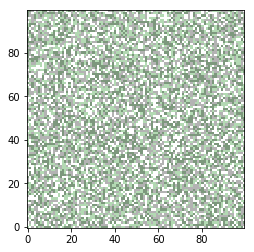

In [52]:
# create dummy data
zvals = np.random.randint(0, 2, (100, 100))# np.random.rand(100,100)*10-5
zvals2 = np.random.randint(0, 2, (100, 100))

img2 = plt.imshow(zvals, interpolation='nearest', cmap=green_cm, origin='lower')
img3 = plt.imshow(zvals2, interpolation='nearest', cmap=black_cm, origin='lower')

plt.show()

### load scene and plot

In [4]:
from utils.scene_utils import get_scenes
scene = get_scenes(random_file=True)[0][0]

Found 251 files in total
load file: /local/data/scenes/80_new/pioneer2/04_06/2017-04-06-15-54-20_18.npy
Found 38 scenes in total
Found 31 scenes (= 81.579%) whose interval is >= 2s
Found 0 scenes (= 0.000%) whose interval does not match number of hits.


In [5]:
show_contents(scene)

NameError: name 'show_contents' is not defined

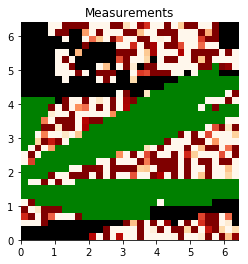

KeyboardInterrupt: 

In [6]:

from propagation.animation import Plot
fig = plt.figure()
ax = fig.add_subplot(111)
plot = Plot(ax, scene.static_map, scene.res, plot_seen=True)

for i in range(scene.hits.shape[0]):
    plot.occupancy_axes.set_data(np.random.randn(*scene.static_map.shape))
    plot.seen_axes.set_data(np.rot90(scene.seens[i]))
    raw_input()
    #fig.canvas.draw()
    plt.show()

### check overlap between wall and seen

In [1]:
from utils.scene_utils import get_scenes
scene = get_scenes(random_file=True)[0][0]

Found 251 files in total
load file: /local/data/scenes/80_new/pioneer2/04_13/2017-04-13-12-33-31_11.npy
Found 50 scenes in total
Found 42 scenes (= 84.000%) whose interval is >= 2s
Found 0 scenes (= 0.000%) whose interval does not match number of hits.


In [2]:
from propagation.bofum import conditionalBOFUM

kwargs = dict(omega=0.05,
              extent=7,
              noise_var= 0.6,
              verbose=False)
bofum = conditionalBOFUM(scene.static_map, '20_ALL_MAPS_W_MASK',
                                   name = 'BOFUM with n. o. as acceleration',
                                   simulated_data=False,
                                   with_reachability=True,
                                   fake_network_pred=False,
                                   acceleration_interpretation=True,
                                   **kwargs)

In [3]:
bofum.initialize(scene)

TypeError: unbound method evaluate_loc_at() must be called with BOFUMRealdata instance as first argument (got conditionalBOFUM instance instead)

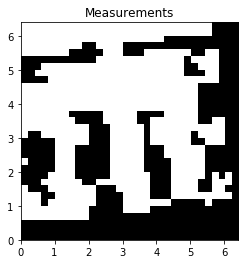

In [33]:
from propagation.animation import Plot
fig = plt.figure()
ax = fig.add_subplot(111)
plot = Plot(ax, scene.static_map, scene.res, plot_seen=True)
plot.seen_axes.set_data(np.rot90(bofum.evaluate_loc_at()))

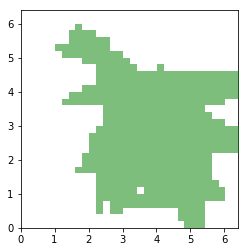

In [62]:
from propagation.animation import Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_image(show_map(scene.seens[0], resolution=scene.res, cmap=green_cm, ax=ax))
#ax.add_image(show_map(scene.static_map, resolution=scene.res, cmap=black_cm, ax=ax))

In [65]:
scene.seens.shape

(30, 32, 32)

NameError: name 'green_cm' is not defined

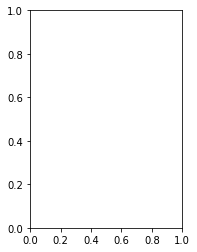

In [203]:
for i in range(scene.seens.shape[0]):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    seen_ = scene.seens[i].copy()
    ax.add_image(show_map(seen_, resolution=0.2, cmap=green_cm, zorder=12, ax=ax))
    ax.add_image(show_map(scene.static_map, resolution=0.2, ax=ax))
    print("%d cells can be seen" % seen_.sum())
    map = scene.static_map
    print("%d cells overlap between seen and map" % np.logical_and(seen_, map).sum())
    seen_[np.where(np.logical_and(seen_, map))]=0
    ax = fig.add_subplot(122)
    ax.add_image(show_map(seen_, resolution=0.2, cmap=green_cm, zorder=12, ax=ax))
    ax.add_image(show_map(scene.static_map, resolution=0.2, ax=ax))
    print("%d cells can be seen" % seen_.sum())
    print("%d cells overlap between seen and map" % np.logical_and(seen_, map).sum())
    plt.show()
    raw_input()
    

[[1 0 0 0]
 [0 1 1 1]
 [0 0 1 0]
 [0 1 1 1]]
[[2 1 1 1]
 [1 2 2 2]
 [1 1 2 1]
 [1 2 2 2]]


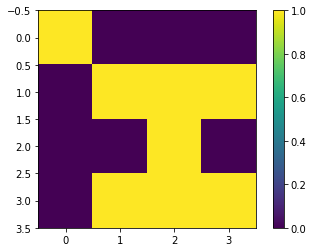

In [17]:
x = np.random.randint(0, 2, (4, 4))
print(x)
ax = plt.imshow(x)
plt.colorbar(ax)
x += 1
print(x)

In [71]:
32*32

1024

In [76]:
map = np.tile([1, 0, 0, 0, 0, 0, 1]* 20)

TypeError: tile() takes exactly 2 arguments (1 given)

In [77]:
map = np.array([[1, 0, 0, 0, 0, 0, 1]] * 20)

In [24]:
np.where(map)

[autoreload of propagation.bofum failed: Traceback (most recent call last):
  File "/local/home/ful7rng/.anaconda/envs/ful/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/local/home/ful7rng/projects/transition/propagation/bofum.py", line 572
    idx = np.random.randint(0, self.empty_locs[0].)
                                                  ^
SyntaxError: invalid syntax
]


(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
         7,  8,  8,  8,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
        12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
        16, 17, 17, 17, 17, 18, 18, 19, 20, 20, 21, 21, 21, 21, 22, 22, 22,
        22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24,
        24, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27,
        27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29,
        30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 31]),
 array([ 1,  2,  3, 22, 23, 24, 28, 29, 30, 31,  1,  2,  3, 22, 23, 24, 26,
        27, 29, 30, 31,  0,  1,  2,  3, 22, 23, 24, 26, 27, 28

In [25]:
np.inf

inf

In [26]:
1e6

1000000.0

### color mixture

In [75]:
x = np.zeros((30, 30))
x[14:19, 14:19] = np.random.randn(5, 5)
y = np.zeros_like(x)
y[15:20, 15:20] = np.random.randint(0, 2, (5, 5))
z = np.logical_and(x, y)
overlap = np.where(z)
#x[overlap] = 0
y[overlap] = 0

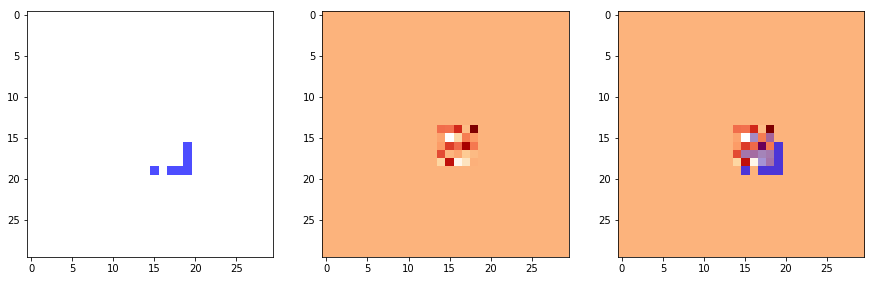

In [77]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(131)
ax.imshow(y, cmap=blue_cm)
ax = fig.add_subplot(132)
ax.imshow(x, cmap='OrRd')
ax = fig.add_subplot(133)
ax.imshow(x, cmap='OrRd')
ax.imshow(z, cmap=blue_cm, alpha=0.5)
ax.imshow(y, cmap=blue_cm)


### cross entropy difference

In [296]:

from utils.scene_utils import get_scenes
min_time_interval = 3
max_time_interval = 4
# fname= '/local/data/scenes/100_11/c3bo/05_10/2017-05-10-10-23-43_3.npy'
fname = '/local/data/scenes/100_11/mimo/05_15/2017-05-15-09-41-31_2.npy'
scene= get_scenes(random_file=True,
                  min_time_interval=min_time_interval,
                  max_time_interval=max_time_interval,
                  file_name=fname)[0][0]

load file: /local/data/scenes/100_11/mimo/05_15/2017-05-15-09-41-31_2.npy
Found 14 scenes in total
Found 1 scenes (= 7.143%) whose interval is in range (3, 4)
Found 1 scenes (= 7.143%) whose interval does not match number of hits.


In [297]:
from propagation.bofum import conditionalBOFUM, naiveBOFUM

kwargs = dict(omega=0.05,
              extent=7,
              verbose=False)
bofum = conditionalBOFUM(scene.static_map, '20_ALL_MAPS_W_MASK',
                                   name = 'BOFUM with n. o. as acceleration',
                                   simulated_data=False,
                                   with_reachability=True,
                                   fake_network_pred=False,
                                   acceleration_interpretation=True,
                                   noise_var=0.5,
                                   **kwargs)
naive_bofum = naiveBOFUM(scene.static_map, name='BOFUM', simulated_data=False, noise_var=0.6, **kwargs)

In [298]:
preprocess = False
bofum.initialize(scene, preprocessing=preprocess)
naive_bofum.initialize(scene, preprocessing=preprocess)

In [299]:
models = [naive_bofum, bofum]

In [300]:
def cross_entropy(caculate_at, P_occ_obser, P_occ_pred):
    """ Caculate cross entropy between prediction and ground truth."""

    # only calculate for specified locations on map
    locs = np.where(caculate_at)
    #P_occ_obser = P_occ_obser[locs]
    #P_occ_pred = P_occ_pred[locs]

    # cliping for numeric stability
    eps = 1e-12
    P_occ_pred = P_occ_pred.clip(0 + eps, 1 - eps)

    P_n_occ_obser = 1 - P_occ_obser
    P_n_occ_pred = 1 - P_occ_pred
    res = - (P_occ_obser * np.log(P_occ_pred) + P_n_occ_obser * np.log(P_n_occ_pred))
    res = np.where(caculate_at, res, 0)
    return res, locs[0].shape[0]

In [301]:
from utils.plot_utils import plot_4d_tensor

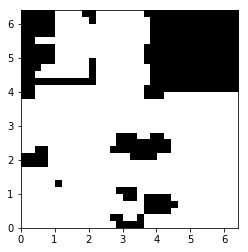

In [306]:
show_map(scene.static_map, resolution=0.2)

0.0
0.0
(0.015199462019642939, 0.018309844651623948)
naive bofum: 5.89739126362
bofum: 7.10421972483


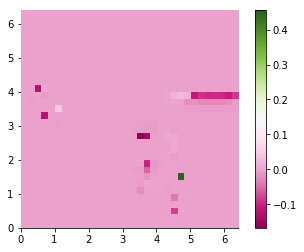

In [305]:
gt = bofum.ground_truth_at()
map(lambda model: model.propagate(gt), models)

cacl_x_ent = lambda model: cross_entropy(model.evaluate_loc_at(), gt, model.P_Ot)
x_ents = map(cacl_x_ent, models)

print(naive_bofum.P_Ot[2, 21])
print(bofum.P_Ot[2, 21])


diff = x_ents[0][0] - x_ents[1][0]
x_ent = x_ents[0][0].sum() / x_ents[0][1]
x_ent_1 = x_ents[1][0].sum() / x_ents[1][1]
print(x_ent, x_ent_1)

ax = show_map(diff, resolution=0.2, cmap='PiYG')
#ax.set_clim([-0.5, 0.5])

plt.colorbar(ax)
print("naive bofum: {}".format(naive_bofum.calc_cross_entropy()))
print("bofum: {}".format(bofum.calc_cross_entropy()))

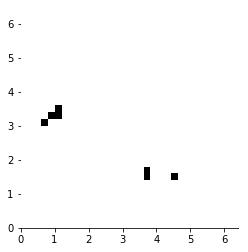

In [13]:
show_map(bofum.ground_truth_at(), resolution=0.2)

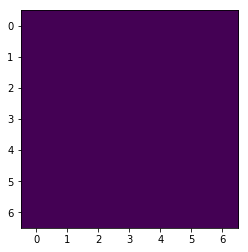

In [157]:
plt.imshow(np.rot90(bofum.P_Vt[2, 21]))

0.0


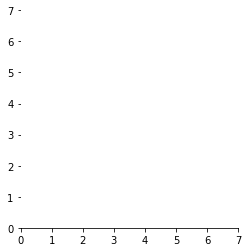

In [158]:
show_map(bofum.P_T_reformed[2, 21], resolution=1, vmin=0, vmax=1)
print(bofum.P_T_reformed[2, 21, 3, 4])

0.0


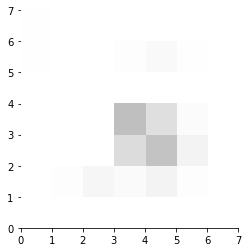

In [159]:
show_map(bofum.P_T[2, 20], resolution=1, vmin=0, vmax=1)
print(bofum.P_T[2, 20, 3, 4])

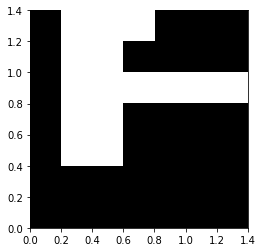

In [160]:
show_map(bofum.P_reachability[2, 20], resolution=0.2, vmin=0, vmax=1)

### scene preprocessing

In [97]:
    def scene_preprocessing(scene):
        t = scene.hits.shape[0]
        # get all occupied cells
        counts = Counter()
        for hit in scene.hits:
            occ_cells = np.array(np.where(hit)).T.tolist()
            for cell in occ_cells:
                counts[tuple(cell)] += 1
        static_cells = []
        for cell in counts:
            # if a cell appears over 1/3 of the time,
            # it is thought as a static cell
            if counts[cell] > t/3:
                static_cells.append(cell)
        idxs = np.array(static_cells).T.tolist()
        if len(idxs) > 0:
            for hit in scene.hits:
                hit[idxs] = 0
        return scene

In [308]:
np.random.rand()

0.11563771907546483

In [321]:
np.random.rand()

0.07965340087660644